<a href="https://colab.research.google.com/github/couragedike1/Neuro-Network-Models/blob/main/RNN_AND_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# STEP 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# For reproducibility
np.random.seed(42)


In [ ]:
# Load the dataset
# Load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(url, usecols=[1])  # Only 'Passengers' column
data.head(100)

,Passengers
0,112
1,118
2,132
3,129
4,121
...,...
95,306
96,315
97,301
98,356


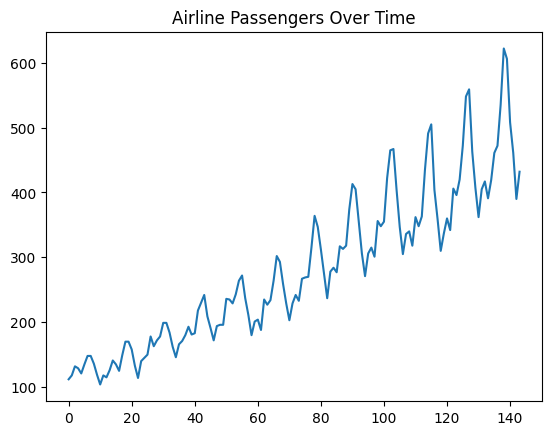

In [ ]:
# 📌 Step 2: Load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(url, usecols=[1])  # Only load 'Passengers' column
plt.plot(data)
plt.title("Airline Passengers Over Time")
plt.show()


In [ ]:
# STEP 3: Normalize Data

# Scaling helps neural networks converge faster
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

# Convert back to DataFrame for readability
scaled_df = pd.DataFrame(scaled_data, columns=["Passengers"])
scaled_df.head()

,Passengers
0,0.015444
1,0.027027
2,0.054054
3,0.048263
4,0.032819


In [ ]:
# STEP 4: Prepare Sequences

# Function to create X, y sequences for supervised learning
def create_sequences(dataset, time_step=10):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i+time_step), 0])  # Past 'time_step' values
        y.append(dataset[i+time_step, 0])      # The next value
    return np.array(X), np.array(y)

time_step = 10
X, y = create_sequences(scaled_data, time_step)

# Reshape input to [samples, time steps, features]
# Required format for RNN/LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (133, 10, 1)
y shape: (133,)


In [ ]:
# STEP 5: Train-Test Split

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print("Train samples:", len(X_train))
print("Test samples:", len(X_test))

Train samples: 106
Test samples: 27


In [ ]:
# STEP 6: Build RNN Model

rnn_model = Sequential()
rnn_model.add(SimpleRNN(units=50, activation='tanh', input_shape=(time_step,1)))
rnn_model.add(Dense(1))  # Output layer

rnn_model.compile(optimizer='adam', loss='mean_squared_error')
rnn_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# STEP 7: Train RNN

history_rnn = rnn_model.fit(X_train, y_train, epochs=50, batch_size=32,validation_data=(X_test,y_test), verbose=1)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - loss: 0.2594 - val_loss: 0.0354
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0246 - val_loss: 0.0585
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0501 - val_loss: 0.0204
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0127 - val_loss: 0.0581
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0145 - val_loss: 0.0775
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0190 - val_loss: 0.0439
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0066 - val_loss: 0.0209
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0056 - val_loss: 0.0162
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0071 - val_loss: 0.0158
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0066 - val_loss: 0.0168
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0044 - val_loss: 0.0190
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0047 - val_loss: 0.0197


In [ ]:
# STEP 8: Build LSTM Model

lstm_model = Sequential()
lstm_model.add(LSTM(units=50, activation='tanh', input_shape=(time_step,1)))
lstm_model.add(Dense(1))  # Output layer

lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# STEP 9: Train LSTM

history_lstm = lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test,y_test), verbose=1)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - loss: 0.1352 - val_loss: 0.4268
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0893 - val_loss: 0.2827
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0576 - val_loss: 0.1669
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0308 - val_loss: 0.0804
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0186 - val_loss: 0.0330
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0138 - val_loss: 0.0257
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0169 - val_loss: 0.0256
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0151 - val_loss: 0.0277
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0116 - val_loss: 0.0345
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0108 - val_loss: 0.0395
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0126 - val_loss: 0.0386
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0097 - val_loss: 0.0342


In [ ]:
# STEP 10: Predictions

# Predict with RNN
rnn_pred = rnn_model.predict(X_test)
rnn_pred_rescaled = scaler.inverse_transform(rnn_pred)

# Predict with LSTM
lstm_pred = lstm_model.predict(X_test)
lstm_pred_rescaled = scaler.inverse_transform(lstm_pred)

# Actual values (rescale back)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


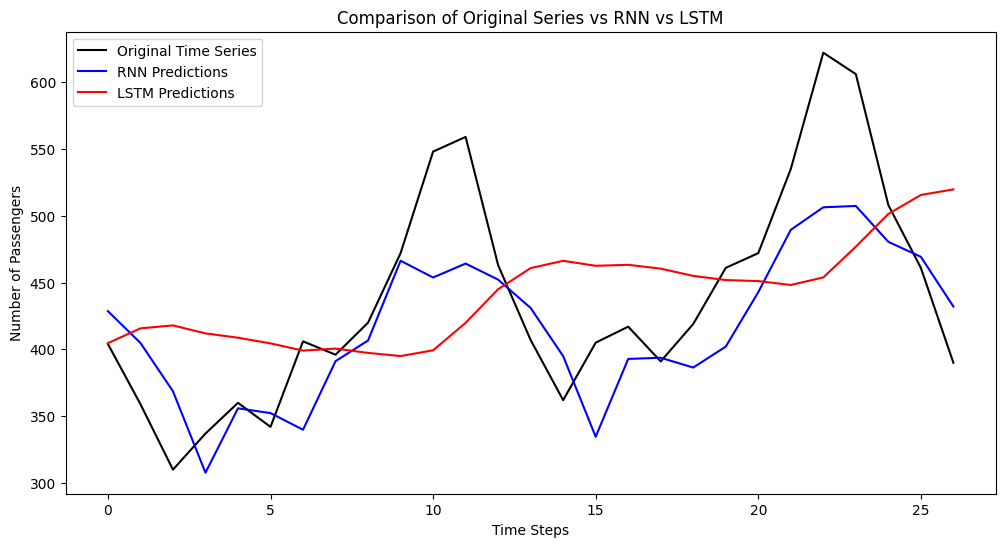

In [ ]:
# =========================
# STEP 11: Visualization
# =========================
plt.figure(figsize=(12,6))
plt.plot(y_test_rescaled, label="Original Time Series", color='black')
plt.plot(rnn_pred_rescaled, label="RNN Predictions", color='blue')
plt.plot(lstm_pred_rescaled, label="LSTM Predictions", color='red')
plt.title("Comparison of Original Series vs RNN vs LSTM")
plt.xlabel("Time Steps")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()

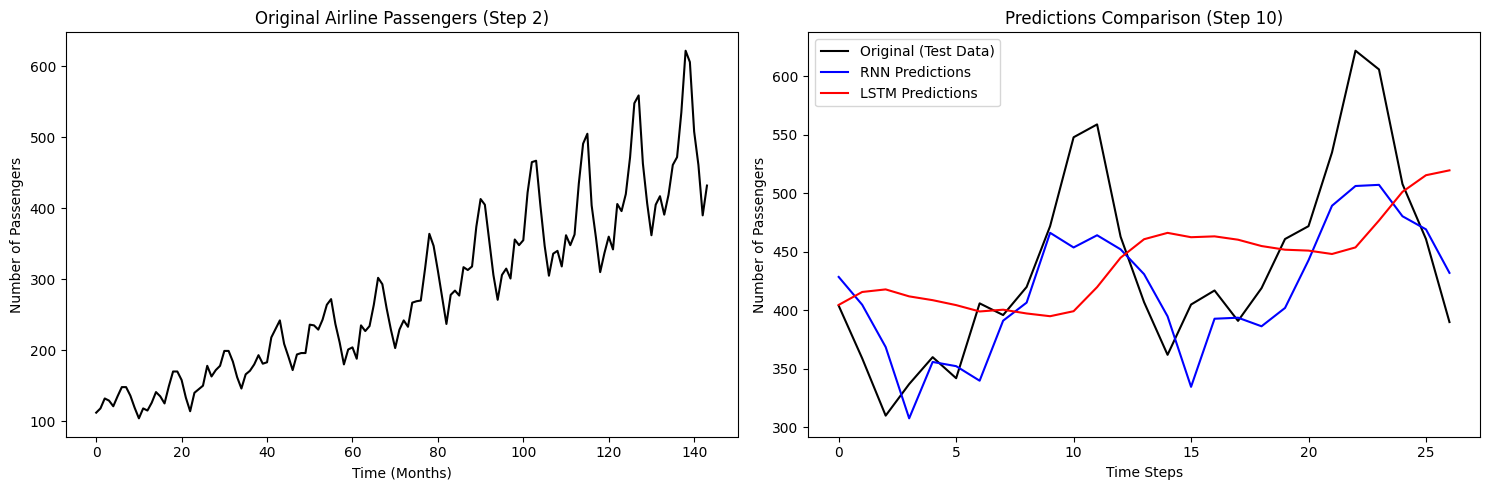

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# --- Left: Original Time Series (Step 2)
axes[0].plot(data, color='black')
axes[0].set_title("Original Airline Passengers (Step 2)")
axes[0].set_xlabel("Time (Months)")
axes[0].set_ylabel("Number of Passengers")

# --- Right: Predictions vs Original (Step 10)
axes[1].plot(y_test_rescaled, label="Original (Test Data)", color='black')
axes[1].plot(rnn_pred_rescaled, label="RNN Predictions", color='blue')
axes[1].plot(lstm_pred_rescaled, label="LSTM Predictions", color='red')
axes[1].set_title("Predictions Comparison (Step 10)")
axes[1].set_xlabel("Time Steps")
axes[1].set_ylabel("Number of Passengers")
axes[1].legend()

plt.tight_layout()
plt.show()

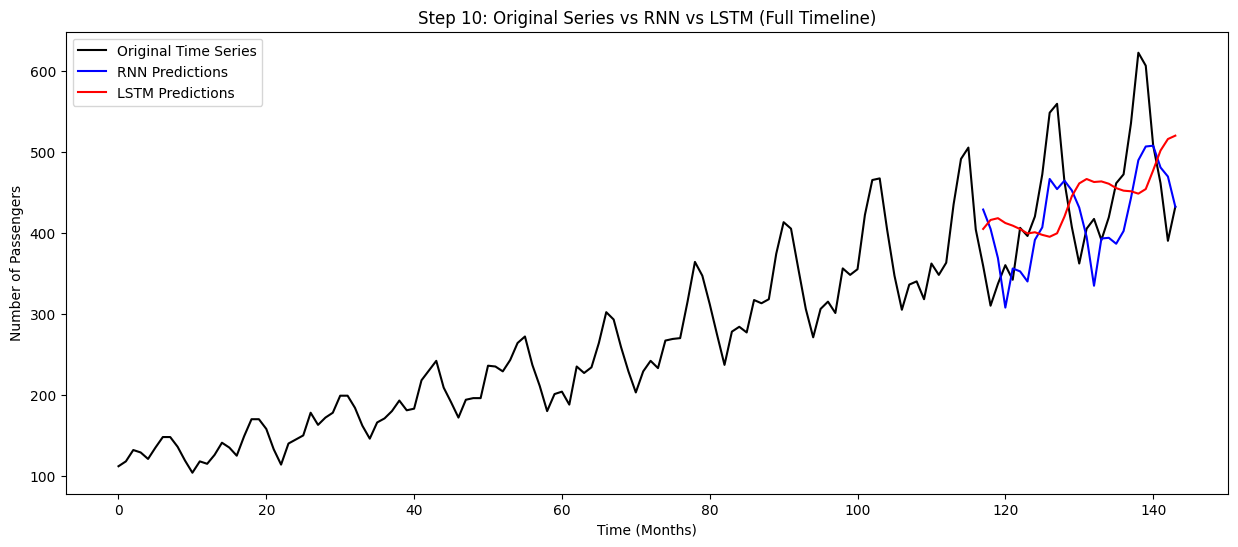

In [ ]:
# =========================
# Long Graph for Step 10
# =========================

plt.figure(figsize=(15,6))

# Plot the entire original series
plt.plot(data.values, label="Original Time Series", color='black')

# Align predictions with their place in the full timeline
# The test set starts after train_size
test_index = range(train_size + time_step + 1, train_size + time_step + 1 + len(y_test_rescaled))

plt.plot(test_index, rnn_pred_rescaled, label="RNN Predictions", color='blue')
plt.plot(test_index, lstm_pred_rescaled, label="LSTM Predictions", color='red')

plt.title("Step 10: Original Series vs RNN vs LSTM (Full Timeline)")
plt.xlabel("Time (Months)")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()
